In [2]:
# These are the libraries will be used.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

from tqdm import tqdm
from dataSet import *
from unet_model import *
from torch.utils.data import DataLoader, random_split
from diceCoefficient import *

In [3]:
# Data Augmentation

# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Change these directories as needed

# Image Directories 
# image
dir_image='/home/matmatius/Desktop/otsuImages/originalrgb/'
# mask
dir_mask='/home/matmatius/Desktop/otsuImages/masksrgb/'
# scale image

In [5]:
dataset=Dataset(dir_image,dir_mask)

In [6]:
dataset[0]['image'][0,1,10]

tensor(0.3451, dtype=torch.float64)

In [7]:
print('Rotated Image')
#rotating the image by 60 degrees
rotated = rotate(dataset[2]['mask'][0], angle=45)#, mode = 'wrap')
rotated.shape

Rotated Image


(128, 128)

Text(0.5, 1.0, 'mask rotated')

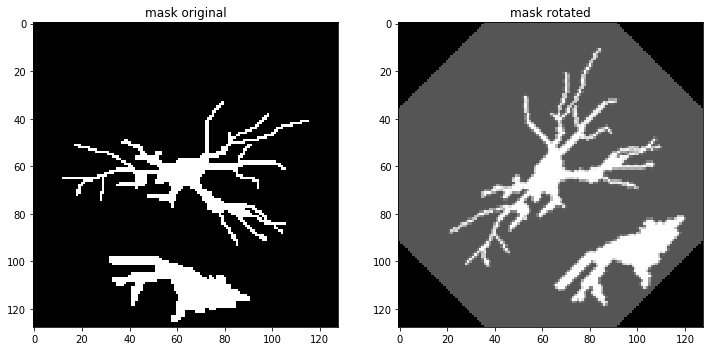

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(dataset[2]['mask'][0].numpy(),cmap='gray')
axs[0].set_title('mask original')
axs[1].imshow(rotated,cmap='gray')
axs[1].set_title('mask rotated')

Text(0.5, 1.0, 'hist rotated')

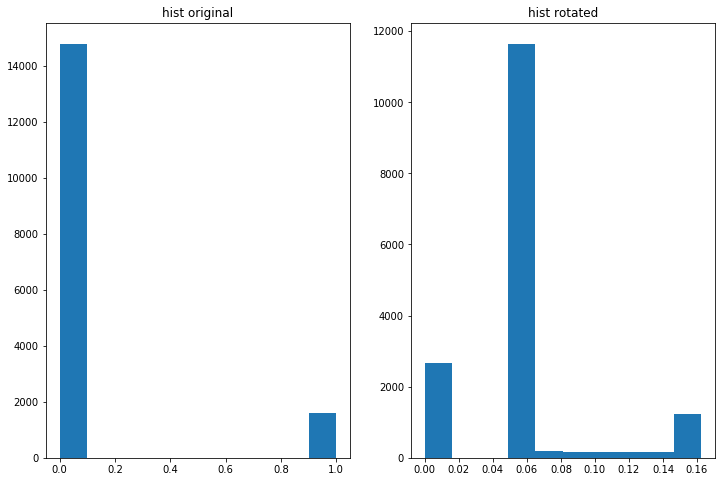

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].hist(dataset[2]['mask'][0].view(-1,1).numpy())
axs[0].set_title('hist original')
axs[1].hist(rotated.reshape(128*128,1)*1e18)
axs[1].set_title('hist rotated')


In [10]:
print(type(rotated),rotated.shape)

<class 'numpy.ndarray'> (128, 128)


In [11]:
val = filters.threshold_otsu(rotated)
otsuOut=(rotated>val)*1

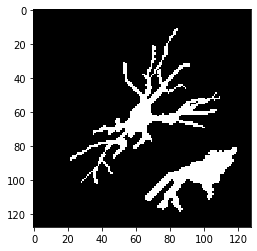

In [12]:
plt.imshow(otsuOut,cmap='gray')

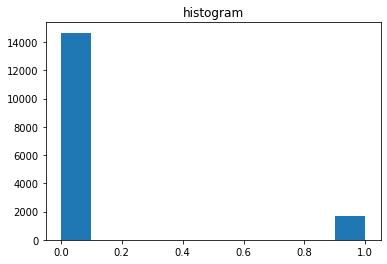

In [13]:
plt.hist(otsuOut.reshape(128*128,1))
plt.title('histogram')
plt.show()

In [14]:
def rotationMask45(x):
    rotated = rotate(x, angle=45)#, mode = 'wrap')
    val = filters.threshold_otsu(rotated)
    rotated=(rotated>val)*1 #otsu
    return rotated

def rotationMask135(x):
    rotated = rotate(x, angle=135)#, mode = 'wrap')
    val = filters.threshold_otsu(rotated)
    rotated=(rotated>val)*1 #otsu
    return rotated

In [15]:
image=dataset[5]['mask'][0]
image.shape

torch.Size([128, 128])

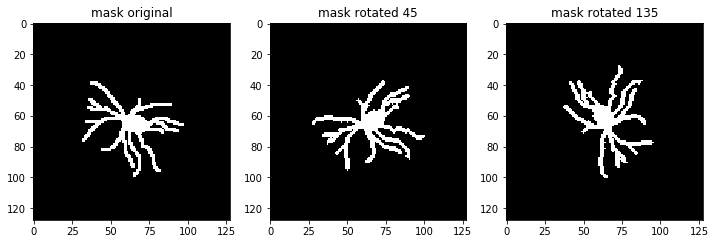

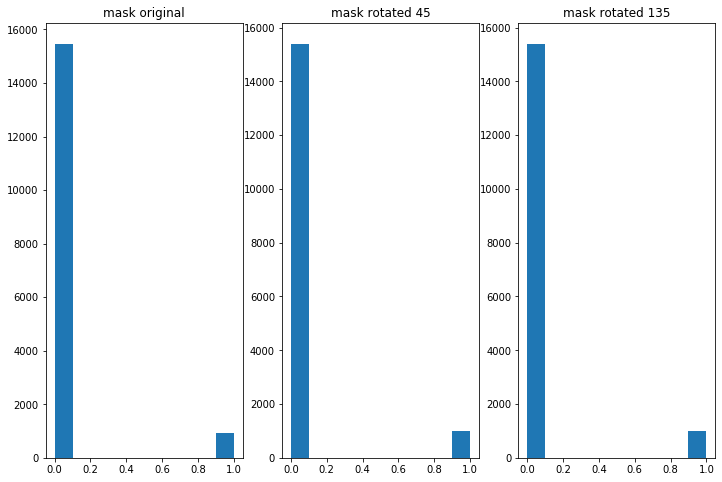

In [16]:

imageR45=rotate(dataset[10]['mask'][0], angle=45, mode = 'wrap')

maskR45=rotationMask45(image)
maskR135=rotationMask135(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

axs[0].imshow(image.numpy(),cmap='gray')
axs[0].set_title('mask original')
axs[1].imshow(maskR45,cmap='gray')
axs[1].set_title('mask rotated 45')
axs[2].imshow(maskR135,cmap='gray')
axs[2].set_title('mask rotated 135')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].hist(dataset[10]['mask'][0].view(-1,1).numpy())#,cmap='gray')
axs[0].set_title('mask original')
axs[1].hist(maskR45.reshape(128*128,1))#,cmap='gray')
axs[1].set_title('mask rotated 45')
axs[2].hist(maskR135.reshape(128*128,1))#,cmap='gray')
axs[2].set_title('mask rotated 135')
plt.show()



In [17]:
image=dataset[5]['image'][0]
imageR45=rotate(image, angle=45)#, mode = 'wrap')
imageR135=rotate(image, angle=135)#, mode = 'wrap')

In [18]:
np.max(imageR135)

0.987170322812431

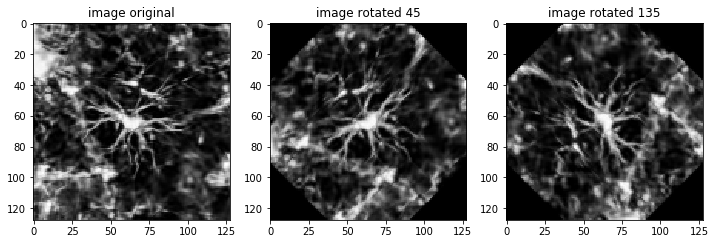

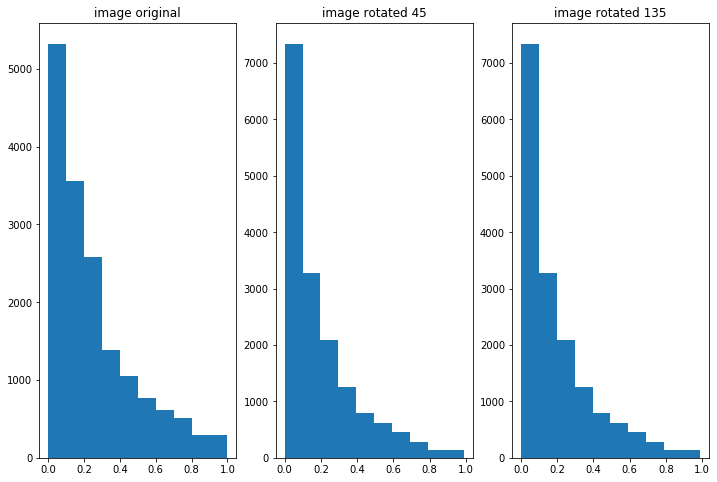

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

axs[0].imshow(image.numpy(),cmap='gray')
axs[0].set_title('image original')
axs[1].imshow(imageR45,cmap='gray')
axs[1].set_title('image rotated 45')
axs[2].imshow(imageR135,cmap='gray')
axs[2].set_title('image rotated 135')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].hist(image.view(-1,1).numpy())#,cmap='gray')
axs[0].set_title('image original')
axs[1].hist(imageR45.reshape(128*128,1))#,cmap='gray')
axs[1].set_title('image rotated 45')
axs[2].hist(imageR135.reshape(128*128,1))#,cmap='gray')
axs[2].set_title('image rotated 135')
plt.show()


In [20]:
#np.fliplr(dataset[10]['image'])
#np.flipud(dataset[10]['image'])

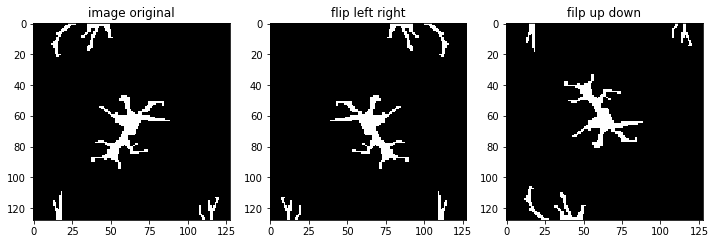

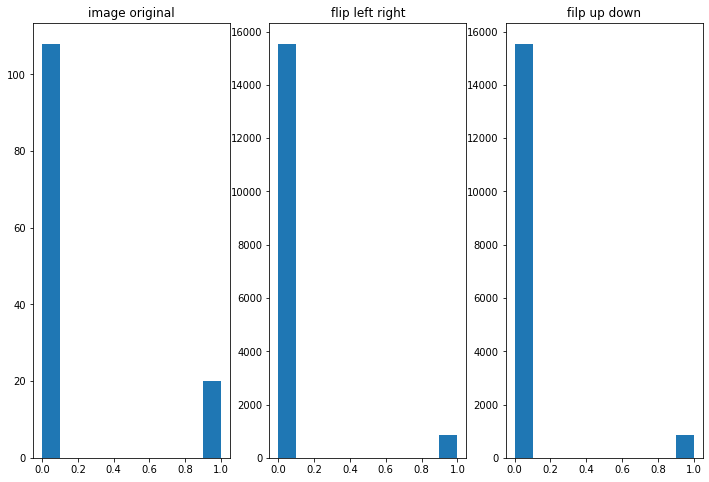

In [21]:
#image flip left right
#image flip up down
image=dataset[12]['mask'][0]
fliplr=np.fliplr(image)
flipud=np.flipud(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

axs[0].imshow(image.numpy(),cmap='gray')
axs[0].set_title('image original')
axs[1].imshow(fliplr,cmap='gray')
axs[1].set_title('flip left right')
axs[2].imshow(flipud,cmap='gray')
axs[2].set_title('filp up down')
plt.show()



fig, axs = plt.subplots(1, 3, figsize=(12, 8))


axs[0].hist(image[0].view(-1,1).numpy())#,cmap='gray')
axs[0].set_title('image original')
axs[1].hist(fliplr.reshape(128*128))#,cmap='gray')
axs[1].set_title('flip left right')
axs[2].hist(flipud.reshape(128*128))#,cmap='gray')
axs[2].set_title('filp up down')
plt.show()


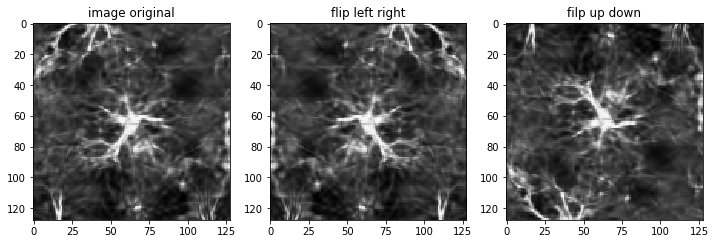

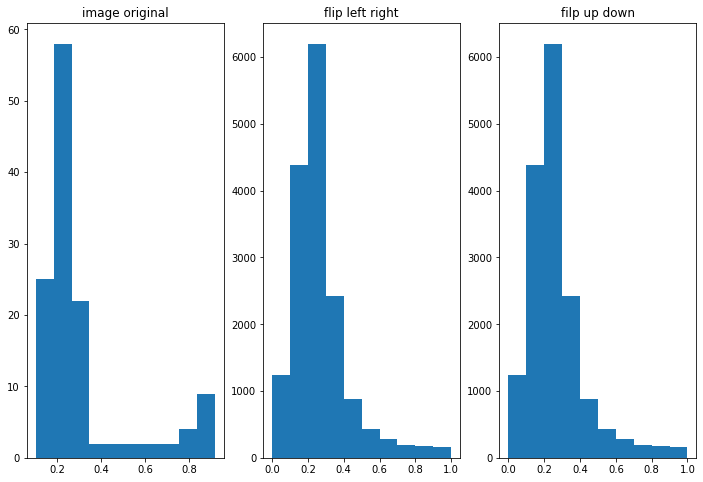

In [22]:
#image flip left right
#image flip up down
image=dataset[12]['image'][0]
fliplr=np.fliplr(image)
flipud=np.flipud(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

axs[0].imshow(image.numpy(),cmap='gray')
axs[0].set_title('image original')
axs[1].imshow(fliplr,cmap='gray')
axs[1].set_title('flip left right')
axs[2].imshow(flipud,cmap='gray')
axs[2].set_title('filp up down')
plt.show()



fig, axs = plt.subplots(1, 3, figsize=(12, 8))


axs[0].hist(image[0].view(-1,1).numpy())#,cmap='gray')
axs[0].set_title('image original')
axs[1].hist(fliplr.reshape(128*128))#,cmap='gray')
axs[1].set_title('flip left right')
axs[2].hist(flipud.reshape(128*128))#,cmap='gray')
axs[2].set_title('filp up down')
plt.show()


In [23]:
# Augmenting Images of Astrocytes

#Rotation functions
def rotationMask45(x):
    rotated = rotate(x, angle=45)
    #val = filters.threshold_otsu(rotated) #this otsu might not be needed
    val=1e-19
    rotated=(rotated>val)*1 #otsu
    return rotated

def rotationMask135(x):
    rotated = rotate(x, angle=135)
    #val = filters.threshold_otsu(rotated) #this otsu might not be needed
    val=1e-19
    rotated=(rotated>val )*1 #otsu
    return rotated

listImage= []
listMask = []
for i in tqdm(range(len(dataset))):
    listImage.append( dataset[i]['image'])
 
    listImage.append(torch.from_numpy(rotate(dataset[i]['image'][0], angle=45)).view(1,128,128))
    listImage.append(torch.from_numpy(rotate(dataset[i]['image'][0], angle=135)).view(1,128,128))
    
    listImage.append(torch.from_numpy(np.array(np.fliplr(dataset[i]['image'][0]))).view(1,128,128))
    listImage.append(torch.from_numpy(np.array(np.flipud(dataset[i]['image'][0]))).view(1,128,128))
    
    # Not sure either include or not random noise
    listImage.append(torch.from_numpy(random_noise(dataset[i]['image'][0],var=0.2**2)).view(1,128,128))
    

                     
    #Mask
    listMask.append(dataset[i]['mask'])
    listMask.append(torch.from_numpy(rotationMask45(dataset[i]['mask'][0])).view(1,128,128))
    listMask.append(torch.from_numpy(rotationMask135(dataset[i]['mask'][0])).view(1,128,128))
    listMask.append(torch.from_numpy(np.array(np.fliplr(dataset[i]['mask'][0]))).view(1,128,128))
    listMask.append(torch.from_numpy(np.array(np.flipud(dataset[i]['mask'][0]))).view(1,128,128))
    
    #listMask.append(torch.from_numpy(np.array(np.fliplr(datargb[i]['mask']) )))
    #listMask.append(torch.from_numpy(np.array(np.flipud(datargb[i]['mask'] )   )))
    
    # Not sure either include or not random noise
    listMask.append(dataset[i]['mask'])

100%|██████████| 118/118 [00:01<00:00, 67.33it/s]


In [24]:
def plotTest(i):
    
    fig, axs = plt.subplots(1, 5, figsize=(20, 8))
    axs[0].imshow(listImage[i][0],cmap='gray')
    axs[0].set_title('image original')
    axs[1].imshow(listImage[i+1][0],cmap='gray')
    axs[1].set_title('rotation 45')
    axs[2].imshow(listImage[i+2][0],cmap='gray')
    axs[2].set_title('rotation 135')
    axs[3].imshow(listImage[i+3][0],cmap='gray')
    axs[3].set_title('filp l r')
    axs[4].imshow(listImage[i+4][0],cmap='gray')
    axs[4].set_title('filp u d')
    plt.show()

    fig, axs = plt.subplots(1, 5, figsize=(20, 8))
    axs[0].imshow(listMask[i][0],cmap='gray')
    axs[0].set_title('image original')
    axs[1].imshow(listMask[i+1][0],cmap='gray')
    axs[1].set_title('rotation 45')
    axs[2].imshow(listMask[i+2][0],cmap='gray')
    axs[2].set_title('rotation 135')
    axs[3].imshow(listMask[i+3][0],cmap='gray')
    axs[3].set_title('filp l r')
    axs[4].imshow(listMask[i+4][0],cmap='gray')
    axs[4].set_title('filp u d')
    plt.show()
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    axs[0].hist(listMask[i][0].view(-1,1).numpy())#,cmap='gray')
    axs[0].set_title('image original')
    axs[1].hist(listMask[i+1][0].view(-1,1).numpy())#,cmap='gray')
    axs[1].set_title('rotation 45')
    axs[2].hist(listMask[i+2][0].view(-1,1).numpy())#,cmap='gray')
    axs[2].set_title('rotation 135')
    axs[3].hist(listMask[i+3][0].view(-1,1).numpy())
    axs[3].set_title('filp l r')
    axs[4].hist(listMask[i+4][0].view(-1,1).numpy())
    axs[4].set_title('filp u d')
    plt.show()


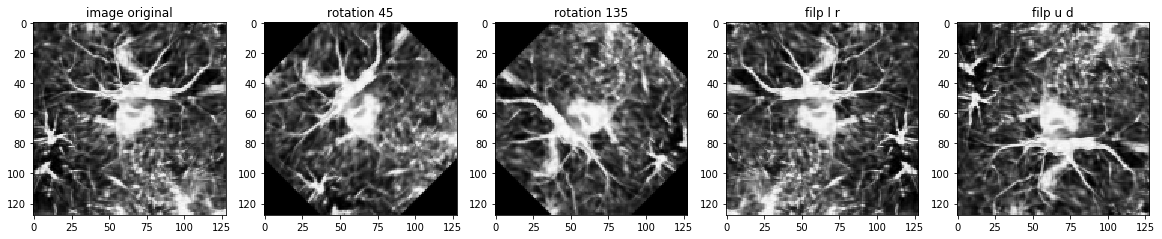

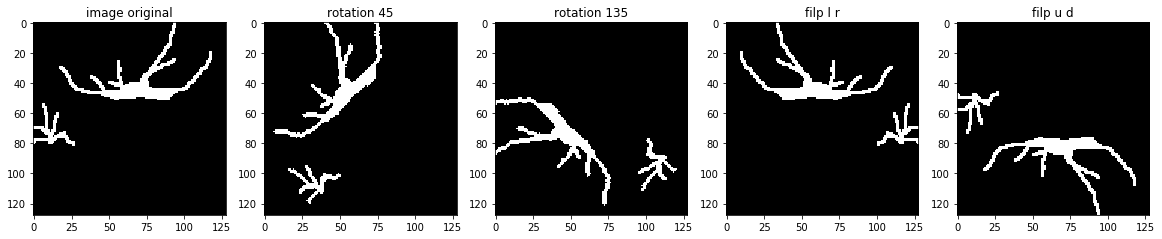

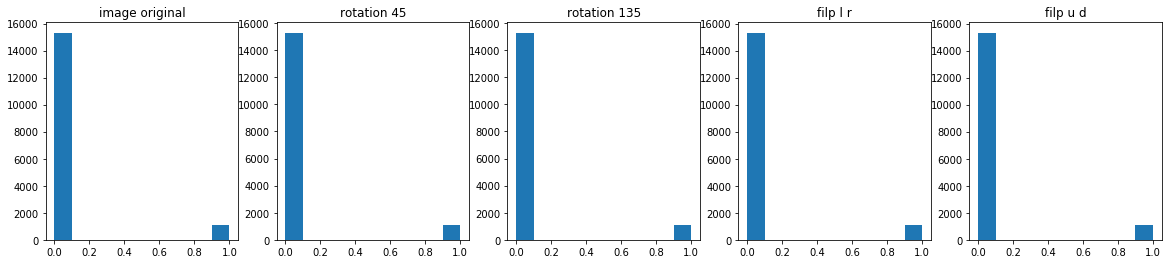

In [29]:
plotTest(6*33)